In [3]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt

In [4]:
## !! CHANGE ME !! ##
os.chdir('C:\\ali\\packages\\s2p-lbm')

In [5]:
from suite2p.io import lbm as lbmio
from suite2p.suite3d.job import Job
from suite2p.suite3d import extension as ext

from suite2p.suite3d import iter_step
from utils import tiff_utils as tfu
from dask import array as darr

C:\Users\ali\anaconda3\envs\s2p-lbm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [201]:
from suite2p.extraction import dcnv
from suite2p.suite3d import ui

In [6]:
## !! Change Me !! ##
analysis_dir = 'Y:\\analysis\\example'

In [7]:
job = Job(analysis_dir, 'test_experiment_001', create=False)

Job directory Y:\analysis\example\s3d-test_experiment_001 already exists
Loading job directory for test_experiment_001 in Y:\analysis\example
   Loading dirs 
      Found dir registered_data
      Found dir summary
      Found dir iters
   Found and loaded params from Y:\analysis\example\s3d-test_experiment_001\params.npy
      Updated params file: Y:\analysis\example\s3d-test_experiment_001\params.npy


In [178]:
job.params['npil_coeff'] = 0.7
job.params['tau'] = 1.3
job.params['dcnv_baseline'] = 'maximin'
job.params['dcnv_win_baseline'] = 60
job.params['dcnv_sig_baseline'] = 10
job.params['dcnv_prctile_baseline'] = 8
job.params['dcnv_batchsize'] = 3000


In [179]:
stats, info = job.get_detected_cells()

In [180]:
traces = job.extract_and_deconvolve()

      Updated params file: Y:\analysis\example\s3d-test_experiment_001\params.npy
   Extracting activity
   Deconvolving
   Saving to Y:\analysis\example\s3d-test_experiment_001\detection\patch-0000


In [207]:
test = n.load(os.path.join(patch_dir, 'stats.npy'),allow_pickle=True)

(0.0, 500.0)

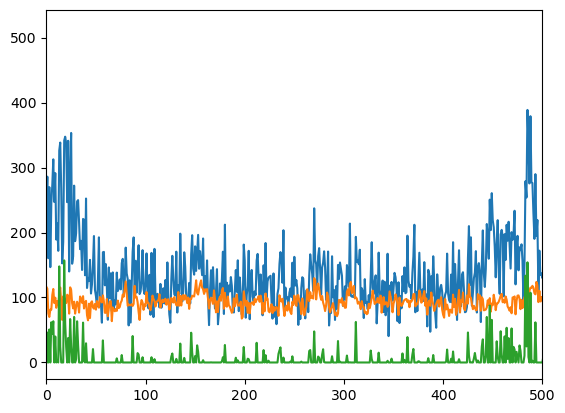

In [200]:
cell_idx = 120
plt.plot(traces['F'][cell_idx])
plt.plot(traces['Fneu'][cell_idx])
plt.plot(traces['spks'][cell_idx])
plt.xlim(0,500)

In [203]:
os.listdir(patch_dir)

['F.npy', 'Fneu.npy', 'info.npy', 'spks.npy', 'stats.npy']

In [263]:
patch_dir = job.get_patch_dir()
output = ui.load_outputs(patch_dir)

In [269]:
n_roi = len(stats)

In [ ]:
cells = n.arange(1000)
not_cells = n.arange(1000)

In [264]:
cell_labels, label_to_idx = ui.make_cell_label_vol(stats, n.arange(1000), output['vmap'].shape, 
                                                   lam_thresh = 0.3, use_patch_coords=True)

In [259]:
import napari
import pyqtgraph as pg

In [271]:
cell_labels[:,:100,:100] = 0

In [267]:
viewer = napari.view_image(output['vmap'],title='3D Vis for %s' % patch_dir, name = 'Correlation Map', opacity=1.0)

labels = viewer.add_labels(cell_labels, name='Cells', opacity=0.6)


widg_dict = {}
widg_dict['plot_widget'] = pg.PlotWidget()
widg_dict['plot_widget'].addLegend()
widg_dict['f_line']      = widg_dict['plot_widget'].plot([0], [0], pen='b', name='F')
widg_dict['fneu_line']   = widg_dict['plot_widget'].plot([0], [0], pen='r', name='Npil')
widg_dict['spks_line']   = widg_dict['plot_widget'].plot([0], [0], pen='w', name = 'Deconv')
widg_dict['dock_widget'] = viewer.window.add_dock_widget(widg_dict['plot_widget'],name='activity',area='bottom')


def get_traces( cell_idx, coeff = 0.7):
    fx = output['F'][cell_idx]
    fn = output['Fneu'][cell_idx]
    ss = output['spks'][cell_idx]
    return output['ts'], fx, fn, ss
    
def update_plot(widg_dict, cell_idx):
    ts, fx, fn, ss = get_traces(cell_idx)
    widg_dict['f_line'].setData(ts, fx)
    widg_dict['fneu_line'].setData(ts, fn)
    widg_dict['spks_line'].setData(ts, ss)


@labels.mouse_drag_callbacks.append
def on_click(labels, event):
    print(event.button)
    value = labels.get_value(
                                position=event.position,
                                view_direction=event.view_direction,
                                dims_displayed=event.dims_displayed,
                                world=True)
    if value is not None:
        if event.button == 1:
            labels.selected_label = value
            print(value)
            update_plot(widg_dict, label_to_idx[value])
        if event.button == 2:

260
294
0
16
452
16
452
16
452
973
12
908
973
12
908
929
990
236
929


In [ ]:
viewer.close()